In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kolesa_cars.csv')

In [3]:
df.head()

,price,year,body_type,volume,fuel,gearbox,type,brand,model
0,5500000,2018,универсал,1.6,бензин,механика,Б/у,ВАЗ,Largus Cross
1,2500000,2013,седан,1.6,бензин,автомат,Б/у,ВАЗ,Granta 2190
2,1800000,2011,седан,1.7,бензин,механика,Б/у,ВАЗ,2107
3,900000,2001,седан,1.5,бензин,механика,Б/у,ВАЗ,2110
4,2000000,2014,седан,1.6,бензин,механика,Б/у,ВАЗ,Granta 2190


In [4]:
df.describe()

,price,year,volume
count,7.680000e+03,7680.000000,7680.000000
mean,7.626141e+06,2010.385417,2.261348
std,8.705018e+06,8.503289,0.851021
min,1.000000e+04,1972.000000,0.700000
25%,1.900000e+06,2005.000000,1.600000
50%,4.650000e+06,2012.000000,2.000000
75%,1.012500e+07,2017.000000,2.500000
max,7.600000e+07,2025.000000,8.000000


<Axes: xlabel='price', ylabel='Count'>

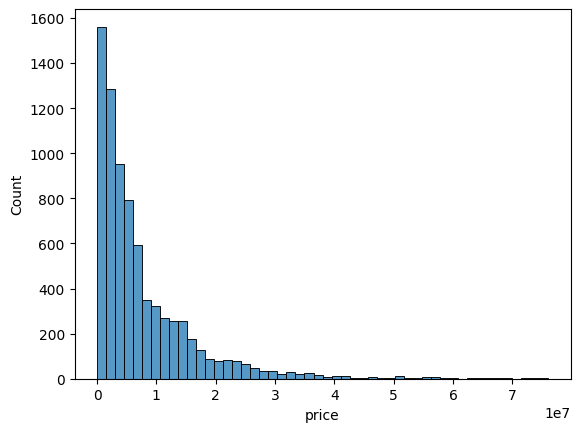

In [56]:
sns.histplot(data=df, x='price', bins=50)

### The graph shows that the Price distribution is strongly right-skewed. Most cars are in the low price segment, but there is a "long tail" of expensive cars.

<Axes: xlabel='brand', ylabel='price'>

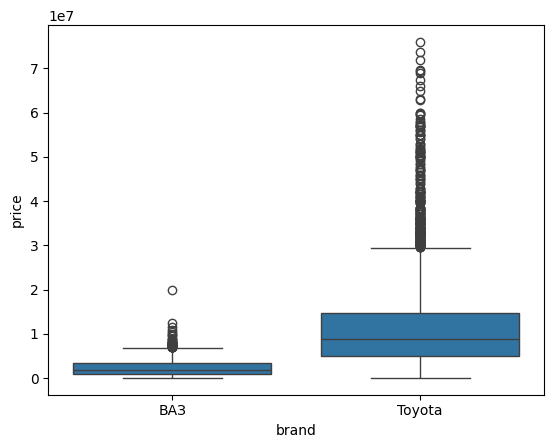

In [57]:
sns.boxplot(data=df, x='brand', y='price')

### We see a huge difference in the price range between Toyota and VAZ.
* **VAZ**: Very compact box, low median. Prices vary slightly.
* **Toyota**: Huge Variation. The median is much higher. The many outliers (outlier points) at the top of the graph are probably expensive models like the Land Cruiser.

<Axes: xlabel='fuel', ylabel='count'>

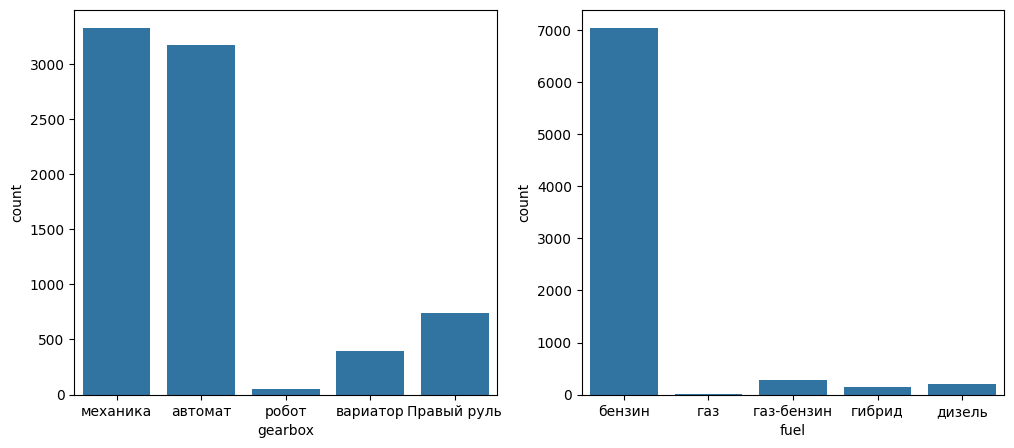

In [64]:
fig ,axes = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(x='gearbox', data=df, ax = axes[0])
sns.countplot(x='fuel', data=df, ax = axes[1])

* **Gearbox:** The ratio of mechanics and automaton is visible. If one class significantly prevails
* **Fuel:** Gasoline is the dominant class. Diesel and gas account for a much smaller share.

In [79]:
sns.boxplot(data=df, x='gearbox', y='price', ax = axes[0])

<Axes: xlabel='gearbox', ylabel='price'>

### Cars with an automatic transmission have a significantly higher median price and a wider IQR (Interquartile Range) than those with a manual transmission.

Text(0.5, 1.0, 'Price vs Year')

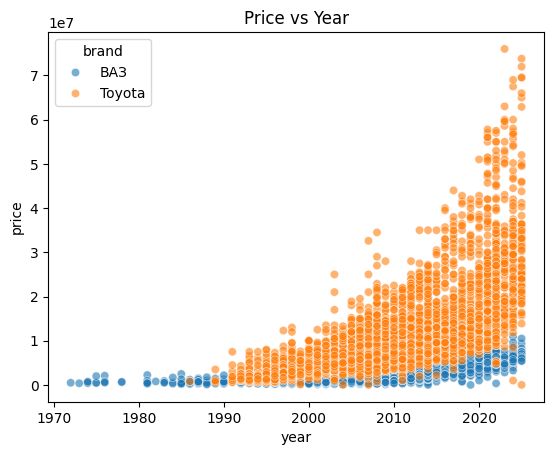

In [76]:
sns.scatterplot(data=df, x='year', y='price', hue='brand', alpha=0.6)
plt.title('Price vs Year')

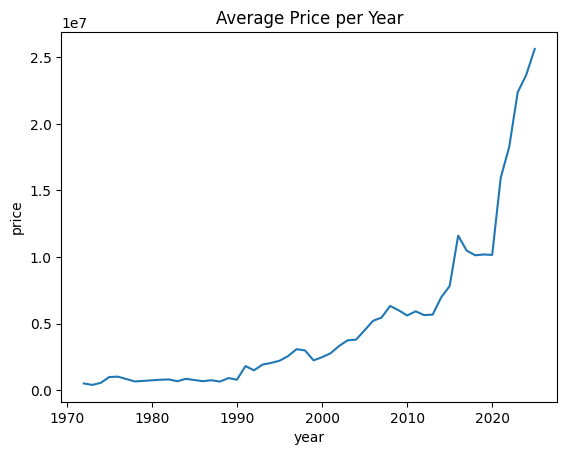

In [67]:
avg_by_year = df.groupby('year')['price'].mean().reset_index()

sns.lineplot(data=avg_by_year, x='year', y='price')
plt.title("Average Price per Year")
plt.show()

### The graph shows that prices are rising every year, we can say that exponentially

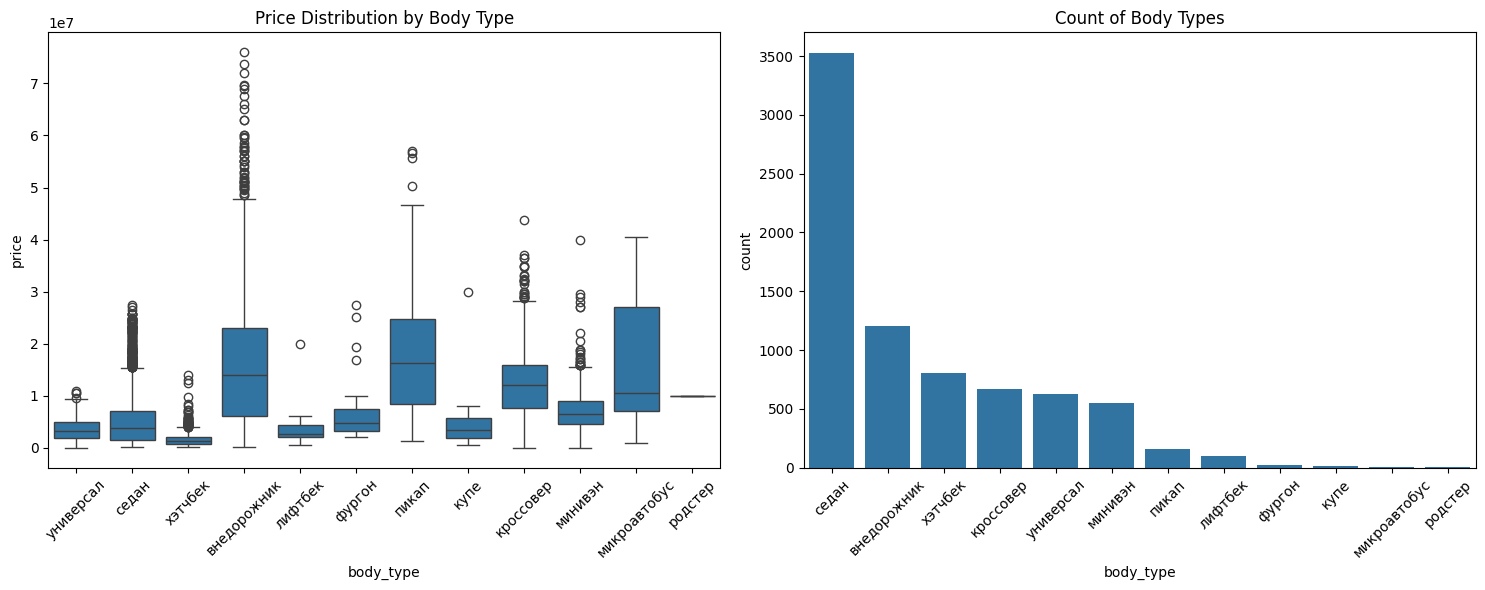

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df, x='body_type', y='price', ax=axes[0])
axes[0].set_title("Price Distribution by Body Type")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='body_type', order=df['body_type'].value_counts().index, ax=axes[1])
axes[1].set_title("Count of Body Types")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

* **SUVs:** The most expensive segment. The median price is significantly higher than the rest, and there are a lot of outliers (expensive models)
* **Minivans and Vans:** The price range is small, mostly working or family budget cars
* **Sedans:** The most popular class, but the median price is lower than that of crossovers. However, there is a long tail of expensive sedans (business class).

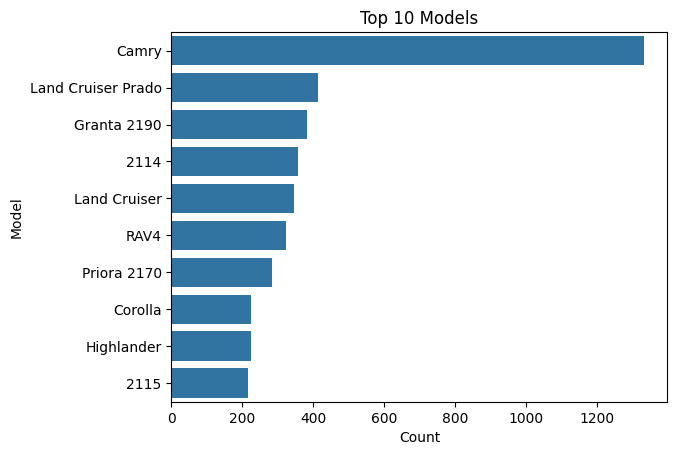

In [98]:
top_models = df['model'].value_counts().head(10)

sns.barplot(x=top_models.values, y=top_models.index)
plt.title("Top 10 Models")
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()

### The most popular model turned out to be the Camry
p.s. who would have thought

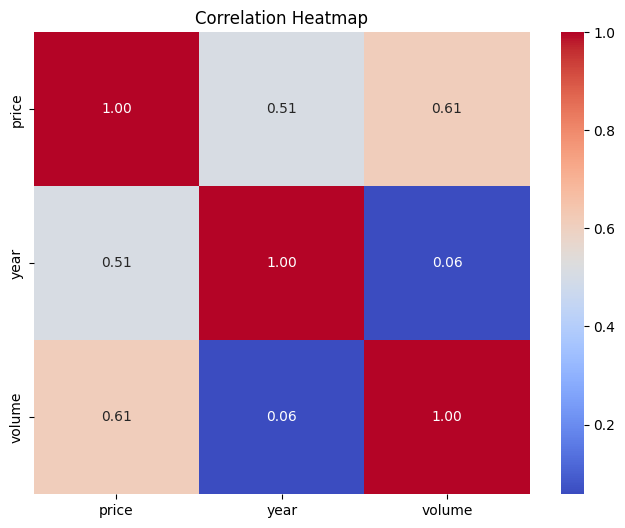

In [99]:
plt.figure(figsize=(8, 6))
numerical_cols = ['price', 'year', 'volume']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### **Price** and **Year** have a high correlation,**Price** и **Volume** also have a high correlation